# Introduction to Pandas. Part II

In [1]:
import pandas as pd

Agenda:

- [Sorting a Series](#1.-Sorting-a-Series)
- [Sorting a DataFrame by a Series](#2.-Sorting-a-DataFrame-by-a-Series)
- [Filtering rows of a pandas DataFrame by column value](#2.-Filtering-rows-of-a-pandas-DataFrame-by-column-value)
- [Applying multiple filter criteria to a pandas DataFrame](#3.-Applying-multiple-filter-criteria-to-a-pandas-DataFrame)
- [Exploring a Series](#4.-Exploring-a-Series)

In [2]:
'load the data'
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv'
movies = pd.read_csv(url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


## 1. Sorting a Series

Documentation for [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html) for a Series.

**Sorting by value:**

In [3]:
movies.title.sort_values() # sort in alphabetical order; returns a Seriesa

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
               ...          
955         Zero Dark Thirty
677                   Zodiac
615               Zombieland
526                     Zulu
864                    [Rec]
Name: title, Length: 979, dtype: object

In [4]:
movies.title.sort_values(ascending=False)

864                    [Rec]
526                     Zulu
615               Zombieland
677                   Zodiac
955         Zero Dark Thirty
               ...          
110    2001: A Space Odyssey
698                127 Hours
201         12 Years a Slave
5               12 Angry Men
542     (500) Days of Summer
Name: title, Length: 979, dtype: object

In [5]:
movies.duration.sort_values() # sort by value

389     64
338     66
258     67
293     68
88      68
      ... 
445    220
142    224
78     229
157    238
476    242
Name: duration, Length: 979, dtype: int64

In [6]:
movies.duration.sort_values(ascending=False)

476    242
157    238
78     229
142    224
445    220
      ... 
88      68
293     68
258     67
338     66
389     64
Name: duration, Length: 979, dtype: int64

**Sorting by index**

Any Series can also be sorted by its index:

In [7]:
# set 'title' as the index
movies.set_index('title', inplace=True)
movies

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Shawshank Redemption,9.3,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
The Godfather,9.2,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Dark Knight,9.0,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Pulp Fiction,8.9,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...
Tootsie,7.4,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
Back to the Future Part III,7.4,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
Master and Commander: The Far Side of the World,7.4,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


In [8]:
movies.sort_index()

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
(500) Days of Summer,7.8,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
12 Angry Men,8.9,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
12 Years a Slave,8.1,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
127 Hours,7.6,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
2001: A Space Odyssey,8.3,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."
...,...,...,...,...,...
Zero Dark Thirty,7.4,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."
Zodiac,7.7,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
Zombieland,7.7,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."


In [9]:
movies.sort_index(ascending=False)

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
[Rec],7.5,R,Horror,78,"[u'Manuela Velasco', u'Ferran Terraza', u'Jorg..."
Zulu,7.8,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."
Zombieland,7.7,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
Zodiac,7.7,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
Zero Dark Thirty,7.4,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."
...,...,...,...,...,...
2001: A Space Odyssey,8.3,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."
127 Hours,7.6,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
12 Years a Slave,8.1,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."


## 2. Sorting a DataFrame by a Series

Documentation for [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) for a DataFrame

In [10]:
# sort the entire DataFrame by the 'star_rating' Series (returns a DataFrame)
movies.sort_values('star_rating')

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
Wall Street,7.4,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."
Bound,7.4,R,Crime,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
Home Alone,7.4,PG,Comedy,103,"[u'Macaulay Culkin', u'Joe Pesci', u'Daniel St..."
Frances Ha,7.4,R,Comedy,86,"[u'Greta Gerwig', u'Mickey Sumner', u'Adam Dri..."
Eraserhead,7.4,UNRATED,Drama,89,"[u'Jack Nance', u'Charlotte Stewart', u'Allen ..."
...,...,...,...,...,...
"The Good, the Bad and the Ugly",8.9,NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
The Dark Knight,9.0,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [11]:
# sort in descending order instead
movies.sort_values('star_rating', ascending=False).head(20)

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Shawshank Redemption,9.3,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
The Godfather,9.2,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Dark Knight,9.0,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Pulp Fiction,8.9,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
12 Angry Men,8.9,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
"The Good, the Bad and the Ugly",8.9,NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
The Lord of the Rings: The Return of the King,8.9,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Schindler's List,8.9,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."


In [12]:
# sort the DataFrame first by 'star_rating', then by 'duration'
movies.sort_values(['star_rating', 'duration']).head(20)

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
Alice in Wonderland,7.4,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
Frances Ha,7.4,R,Comedy,86,"[u'Greta Gerwig', u'Mickey Sumner', u'Adam Dri..."
The Simpsons Movie,7.4,PG-13,Animation,87,"[u'Dan Castellaneta', u'Julie Kavner', u'Nancy..."
Eraserhead,7.4,UNRATED,Drama,89,"[u'Jack Nance', u'Charlotte Stewart', u'Allen ..."
Death at a Funeral,7.4,R,Comedy,90,"[u'Matthew Macfadyen', u'Peter Dinklage', u'Ew..."
Beetlejuice,7.4,PG,Comedy,92,"[u'Alec Baldwin', u'Geena Davis', u'Michael Ke..."
Raising Arizona,7.4,PG-13,Comedy,94,"[u'Nicolas Cage', u'Holly Hunter', u'Trey Wils..."
Deconstructing Harry,7.4,R,Comedy,96,"[u'Woody Allen', u'Judy Davis', u'Julia Louis-..."
Predestination,7.4,R,Drama,97,"[u'Ethan Hawke', u'Sarah Snook', u'Noah Taylor']"


In [13]:
movies.sort_values(['star_rating', 'duration'], ascending=[False,True]).head(20)

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Shawshank Redemption,9.3,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
The Godfather,9.2,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Dark Knight,9.0,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
12 Angry Men,8.9,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Fight Club,8.9,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
Pulp Fiction,8.9,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
"The Good, the Bad and the Ugly",8.9,NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
Schindler's List,8.9,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."


## 2. Filtering rows of a pandas DataFrame by column value

**Example 1:** get movies that are at least 200 minutes long

In [14]:
is_long = movies.duration >= 200
is_long.head(10)

title
The Shawshank Redemption                         False
The Godfather                                    False
The Godfather: Part II                            True
The Dark Knight                                  False
Pulp Fiction                                     False
12 Angry Men                                     False
The Good, the Bad and the Ugly                   False
The Lord of the Rings: The Return of the King     True
Schindler's List                                 False
Fight Club                                       False
Name: duration, dtype: bool

In [15]:
# use bracket notation with the boolean Series to tell the DataFrame which rows to display
movies[is_long]

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Lord of the Rings: The Return of the King,8.9,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Seven Samurai,8.7,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
Once Upon a Time in America,8.4,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
Lawrence of Arabia,8.4,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
Lagaan: Once Upon a Time in India,8.3,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
Gone with the Wind,8.2,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
Ben-Hur,8.1,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
The Ten Commandments,7.9,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."


In [16]:
# or equivalently, write it in one line (no need to create the 'is_long' object)
movies[movies.duration>=200]

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Lord of the Rings: The Return of the King,8.9,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Seven Samurai,8.7,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
Once Upon a Time in America,8.4,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
Lawrence of Arabia,8.4,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
Lagaan: Once Upon a Time in India,8.3,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
Gone with the Wind,8.2,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
Ben-Hur,8.1,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
The Ten Commandments,7.9,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."


In [17]:
# select the 'genre' Series from the filtered DataFrame
movies[movies.duration >= 200].genre

title
The Godfather: Part II                               Crime
The Lord of the Rings: The Return of the King    Adventure
Seven Samurai                                        Drama
Once Upon a Time in America                          Crime
Lawrence of Arabia                               Adventure
Lagaan: Once Upon a Time in India                Adventure
Gone with the Wind                                   Drama
Ben-Hur                                          Adventure
The Ten Commandments                             Adventure
Hamlet                                               Drama
Malcolm X                                        Biography
It's a Mad, Mad, Mad, Mad World                     Action
Name: genre, dtype: object

In [18]:
# or equivalently, use the 'loc' method
movies.loc[movies.duration >= 200, 'genre']

title
The Godfather: Part II                               Crime
The Lord of the Rings: The Return of the King    Adventure
Seven Samurai                                        Drama
Once Upon a Time in America                          Crime
Lawrence of Arabia                               Adventure
Lagaan: Once Upon a Time in India                Adventure
Gone with the Wind                                   Drama
Ben-Hur                                          Adventure
The Ten Commandments                             Adventure
Hamlet                                               Drama
Malcolm X                                        Biography
It's a Mad, Mad, Mad, Mad World                     Action
Name: genre, dtype: object

## 3. Applying multiple filter criteria to a pandas DataFrame

Rules for specifying multiple filter criteria in pandas:

- use & instead of and
- use | instead of or
- add parentheses around each condition to specify evaluation order

**Example 2:** get all the dramas that are at least 200 minutes long

In [19]:
is_long_and_drama = (movies.duration>=200) & (movies.genre == 'Drama')
movies[is_long_and_drama]

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
Seven Samurai,8.7,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
Gone with the Wind,8.2,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
Hamlet,7.8,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [20]:
# or equivalently, write it in one line
movies[(movies.duration>=200) & (movies.genre == 'Drama')]

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
Seven Samurai,8.7,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
Gone with the Wind,8.2,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
Hamlet,7.8,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


**Goal:** Filter the original DataFrame to show movies with a 'genre' of 'Crime' or 'Drama' or 'Action'

In [21]:
# use the '|' operator to specify that a row can match any of the three criteria
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head(10)

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Shawshank Redemption,9.3,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
The Godfather,9.2,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Dark Knight,9.0,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Pulp Fiction,8.9,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
12 Angry Men,8.9,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Fight Club,8.9,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
Inception,8.8,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
Star Wars: Episode V - The Empire Strikes Back,8.8,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."


In [22]:
# or equivalently, use the 'isin' method
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head(10)

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Shawshank Redemption,9.3,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
The Godfather,9.2,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Dark Knight,9.0,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Pulp Fiction,8.9,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
12 Angry Men,8.9,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Fight Club,8.9,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
Inception,8.8,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
Star Wars: Episode V - The Empire Strikes Back,8.8,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."


**Bonus:** get all Dramas and Crime films that are at least 200 minutes long

In [23]:
movies[(movies.duration>=200)&(movies.genre.isin(['Drama','Crime']))]

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
Seven Samurai,8.7,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
Once Upon a Time in America,8.4,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
Gone with the Wind,8.2,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
Hamlet,7.8,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


## 4. Exploring a Series

- [Exploring a non-numeric Series](#4.1.-Exploring-a-non-numeric-Series)
- [Exploring a numeric Series](#4.2.-Exploring-a-numeric-Series)

In [24]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [25]:
# examine the data type of each Series
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

### 4.1. Exploring a non-numeric Series

In [26]:
# count the non-null values, unique values, and frequency of the most common value
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [27]:
# display the unique values in the Series
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [28]:
# count how many times each value in the Series occurs
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [29]:
# display percentages instead of raw counts
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [30]:
# 'value_counts' (like many pandas methods) outputs a Series
type(movies.genre.value_counts())

pandas.core.series.Series

In [31]:
# thus, you can add another Series method on the end
movies.genre.value_counts().head(3)

Drama     278
Comedy    156
Action    136
Name: genre, dtype: int64

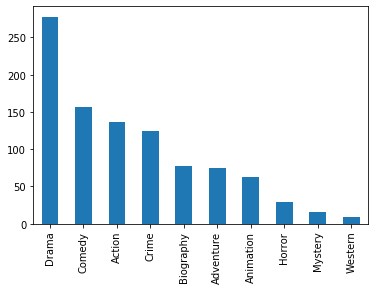

In [32]:
# bar plot of the 'value_counts' for the 'genre' Series
movies.genre.value_counts().head(10).plot(kind='bar')

In [33]:
movies.content_rating.unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [34]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [35]:
# compute a cross-tabulation of two Series
pd.crosstab(movies.genre,movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [49]:
# alternatively, use pivot_table
movies.pivot_table(index='genre', columns = 'content_rating', aggfunc='count', fill_value=0)

actors_list                                                     \
content_rating    APPROVED   G GP NC-17 NOT RATED PASSED  PG PG-13    R TV-MA   
genre                                                                           
Action                   3   1  1     0         4      1  11    44   67     0   
Adventure                3   2  0     0         5      1  21    23   17     0   
Animation                3  20  0     0         3      0  25     5    5     0   
Biography                1   2  1     0         1      0   6    29   36     0   
Comedy                   9   2  1     1        16      3  23    23   73     0   
Crime                    6   0  0     1         7      1   6     4   87     0   
Drama                   12   3  0     4        24      1  25    55  143     1   
Family                   0   1  0     0         0      0   1     0    0     0   
Fantasy                  0   0  0     0         0      0   0     0    1     0   
Film-Noir                1   0  0     0         1      0   0     0    0     0   
History                  0   0  0     0         0      0   0     0    0     0   
Horror                   2   0  0     1         1      0   1     2   16     0   
Mystery                  4   1  0     0         1      0   1     2    6     0   
Sci-Fi                   1   0  0     0         0      0   0     1    3     0   
Thriller                 1   0  0     0         0      0   1     0    3     0   
Western                  1   0  0     0         2      0   2     1    3     0   

                ... title                                                      \
content_rating  ...    GP NC-17 NOT RATED PASSED  PG PG-13    R TV-MA UNRATED   
genre           ...                                                             
Action          ...     1     0         4      1  11    44   67     0       3   
Adventure       ...     0     0         5      1  21    23   17     0       2   
Animation       ...     0     0         3      0  25     5    5     0       1   
Biography       ...     1     0         1      0   6    29   36     0       0   
Comedy          ...     1     1        16      3  23    23   73     0       4   
Crime           ...     0     1         7      1   6     4   87     0      11   
Drama           ...     0     4        24      1  25    55  143     1       9   
Family          ...     0     0         0      0   1     0    0     0       0   
Fantasy         ...     0     0         0      0   0     0    1     0       0   
Film-Noir       ...     0     0         1      0   0     0    0     0       1   
History         ...     0     0         0      0   0     0    0     0       1   
Horror          ...     0     1         1      0   1     2   16     0       5   
Mystery         ...     0     0         1      0   1     2    6     0       1   
Sci-Fi          ...     0     0         0      0   0     1    3     0       0   
Thriller        ...     0     0         0      0   1     0    3     0       0   
Western         ...     0     0         2      0   2     1    3     0       0   

                   
content_rating  X  
genre              
Action          0  
Adventure       0  
Animation       0  
Biography       0  
Comedy          1  
Crime           1  
Drama           1  
Family          0  
Fantasy         0  
Film-Noir       0  
History         0  
Horror          1  
Mystery         0  
Sci-Fi          0  
Thriller        0  
Western         0  

[16 rows x 48 columns]

### 4.2. Exploring a numeric Series

In [36]:
# caculate various summary statistics
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [37]:
# many statistics are implemented as Series moethod
movies.duration.mean() # mean duration

120.97957099080695

In [38]:
movies.duration.max() # maximum

242

In [39]:
movies.duration.std() #standard deviation

26.218009846412112

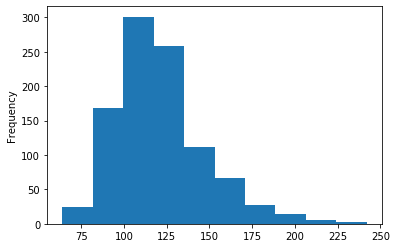

In [40]:
# histogram of the 'duration' Series (shows the distribution of a numerical variable)
movies.duration.plot(kind='hist')

In [48]:
movies.pivot_table('star_rating', index='genre', columns = 'content_rating', aggfunc='mean')

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,7.633333,7.800000,7.7,NaN,7.925000,7.700000,8.036364,7.879545,7.864179,NaN,8.266667,NaN
Adventure,8.100000,8.050000,NaN,NaN,8.160000,8.100000,7.852381,7.960870,7.882353,NaN,8.150000,NaN
Animation,7.600000,7.950000,NaN,NaN,8.033333,NaN,7.896000,7.880000,7.900000,NaN,8.500000,NaN
Biography,7.900000,8.000000,8.0,NaN,7.600000,NaN,7.850000,7.775862,7.919444,NaN,NaN,NaN
Comedy,8.088889,8.150000,8.1,7.60,8.131250,8.233333,7.786957,7.730435,7.732877,NaN,7.875000,7.8
Crime,8.133333,NaN,NaN,7.50,8.171429,8.400000,8.033333,7.750000,7.880460,NaN,7.872727,8.4
Drama,8.133333,8.133333,NaN,7.65,8.129167,8.200000,7.888000,7.805455,7.874825,8.1,8.033333,8.0
Family,NaN,7.800000,NaN,NaN,NaN,NaN,7.900000,NaN,NaN,NaN,NaN,NaN
Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,NaN,NaN
